In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
import gmaps
# Google developer API key
from config import gkey
from datetime import date
# Configure gmaps
gmaps.configure(api_key=gkey)
from pprint import pprint
import itertools
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as stats

In [2]:
#data provided by emily and harlan https://github.com/NABSA/gbfs/blob/master/systems.csv
census_df=pd.read_csv("acs2017_county_data.csv")
del census_df['Hispanic']
del census_df['White']
del census_df['Black']
del census_df['Native']
del census_df['Asian']
del census_df['Pacific']
del census_df['Professional']
list(census_df.columns)
census_df['Service'].values

array([18. , 18.2, 16.8, ..., 21.2, 26. , 20.2])

In [3]:
census_df.loc[census_df['County']=='Waynesboro County']

,CountyId,State,County,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment


In [4]:
max(census_df['IncomePerCap'])

69529

In [5]:
#get income per cap list
= census_df['IncomePerCap']

In [6]:
#get walk minutes list
w = census_df['Walk']

In [7]:
#get county list
c = census_df['County']

In [8]:
#zip list for sampling
wic = list(zip(c,w,i))


In [30]:
#random sampling
county_run = random.choices(wic, k=50)


In [31]:
#copy county list
county = county_run.copy()

In [32]:
#save zipped list as new df
new_df = list(zip(*county))
list(new_df)
final_df = pd.DataFrame(new_df)
final_df = final_df.T


In [42]:
#save data on randomly sampled selection
final_df.to_csv('walk_income_county_data.csv')

In [33]:
#save the counties column as a list for plotting
county_list = final_df[0]
county = county_list.sort_values(ascending = True, inplace = False)


In [34]:
#save the walk and income per capita column as a list for plotting
walk = final_df[1]
income = final_df[2]

<function matplotlib.pyplot.show(*args, **kw)>

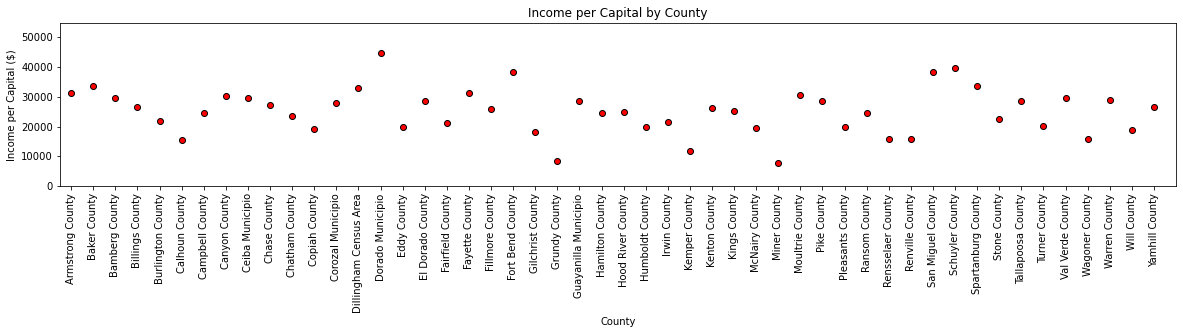

In [49]:
#plot income per capita (scatter)
fig = plt.figure(figsize=(20,3))
plt.scatter(county, income, marker="o", facecolors="red", edgecolors="black")
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(income)+10000)
x_axis = np.arange(len(county))
plt.title("Income per Capital by County")
plt.xlabel("County")
plt.ylabel("Income per Capital ($)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('scatter_income_per_cap_county_bar.png',bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

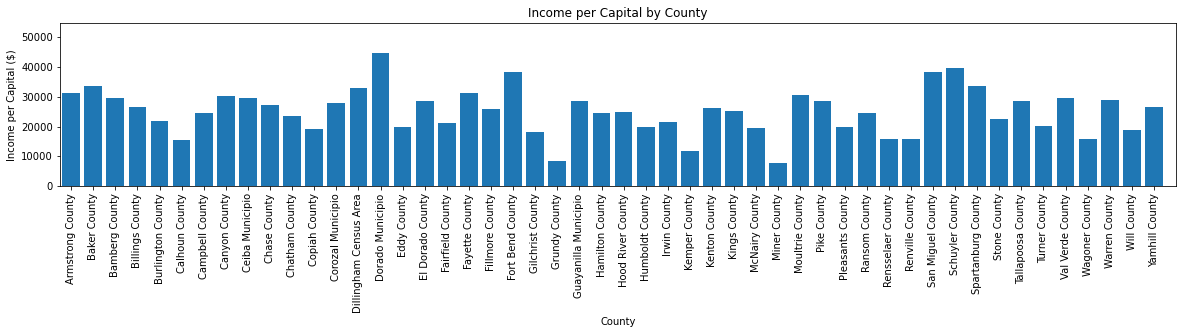

In [48]:
#plot income per capita (bar)
fig = plt.figure(figsize=(20,3))
plt.bar(county, income)
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(income)+10000)
x_axis = np.arange(len(county))
plt.title("Income per Capital by County")
plt.xlabel("County")
plt.ylabel("Income per Capital ($)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('bar_income_per_cap_county.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

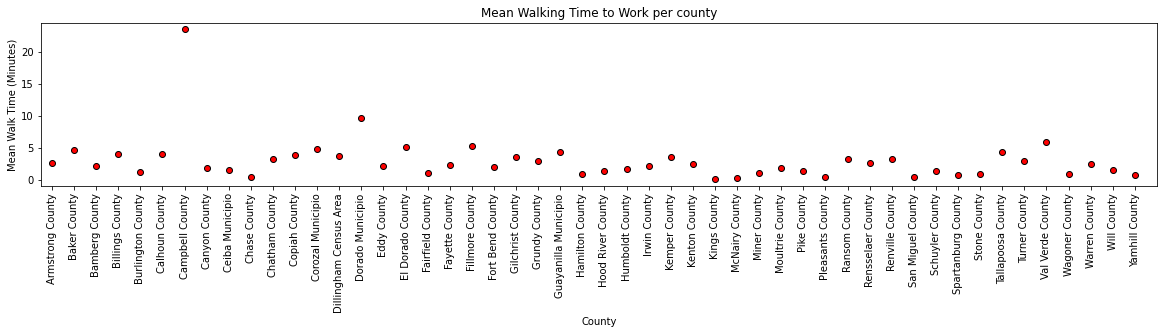

In [50]:
#Mean walk scatter plot
fig = plt.figure(figsize=(20,3))
plt.scatter(county, walk, marker="o", facecolors="red", edgecolors="black")
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(walk)+1)
x_axis = np.arange(len(county))
tick_locations = [value for value in x_axis]
plt.title("Mean Walking Time to Work per county")
plt.xlabel("County")
plt.ylabel("Mean Walk Time (Minutes)")
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('scatter_mean_walk_county.png',bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

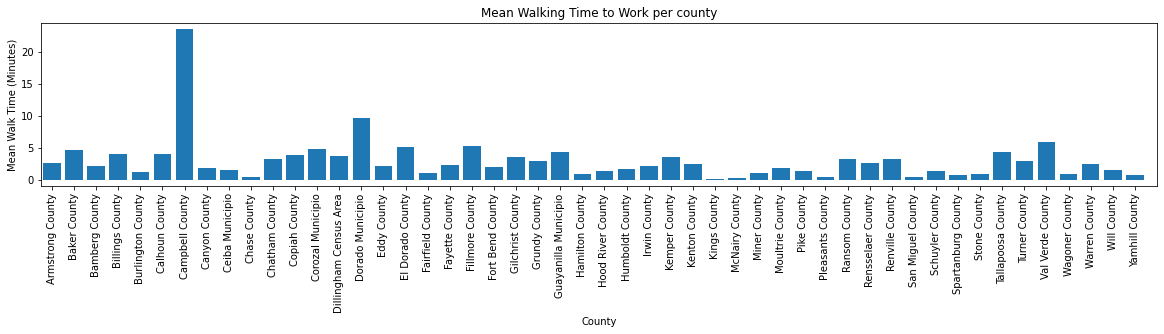

In [47]:
#Mean walk bar
fig = plt.figure(figsize=(20,3))
plt.bar(county, walk)
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(walk)+1)
x_axis = np.arange(len(county))
tick_locations = [value for value in x_axis]
plt.title("Mean Walking Time to Work per county")
plt.xlabel("County")
plt.ylabel("Mean Walk Time (Minutes)")
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('bar_mean_walk_county.png',bbox_inches='tight')
plt.show